# Analysis: delivery for instacart

### Target of this analysis: Uncover more information about sales patterns > recommendations for targeted marketing, to ensure Instacart targets the right customer profiles with the appropriate products.

### Key Questions of Sales Team are:
1) What are the busiest days of the week > advertising should match them
2) What are the busiest hours of the day > advertising should match them
3) Are there particular times of the day, when people spend more money than at other times > this influences product advertisement
4) Create simpler price range groups to reduce complexity of data
5) Most popular products, judging by high frequency of product orders

### Key Questions of Marketing Team are:
1) What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?
2) Are there differences in ordering habits based on a customer’s loyalty status?
3) Are there differences in ordering habits based on a customer’s region?
4) Is there a connection between age and family status in terms of ordering habits?
5) What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?
6) What differences exist in ordering habits of different customer profiles? Considering the price of orders, the frequency of orders, the products customers are ordering, etc.

### Final investigation:
1) exclusion flag for low-activity customers (< 5 orders) and exclude them from the data. export this sample.
2) customer profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.
3) Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
4) Compare your customer profiles with regions and departments. Is there a link?

## Importing libraries and data

In [1]:
#importing the libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from tqdm import tqdm

In [2]:
#importing dataset:
path = r'C:\Users\chris\Documents\Instacart Basket Analysis'
orders_products_all = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_all.pkl'))
deps = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'departments_wrangled.pkl'))

In [3]:
#calling main dataframe to check if imported completely:
orders_products_all.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_days_since_last_order,frequency_type,mean_prices,spender_type
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,20.259259,Non-frequent customer,6.367797,low spender
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,20.259259,Non-frequent customer,6.367797,low spender
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,20.259259,Non-frequent customer,6.367797,low spender
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Mid-range product,Least busy,Least busy,Average orders,10,New customer,20.259259,Non-frequent customer,6.367797,low spender
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Mid-range product,Least busy,Least busy,Most orders,10,New customer,20.259259,Non-frequent customer,6.367797,low spender


In [4]:
orders_products_all.shape

(32399732, 30)

# Key Questions of Sales Team

## Sales: 1) What are the busiest days of the week

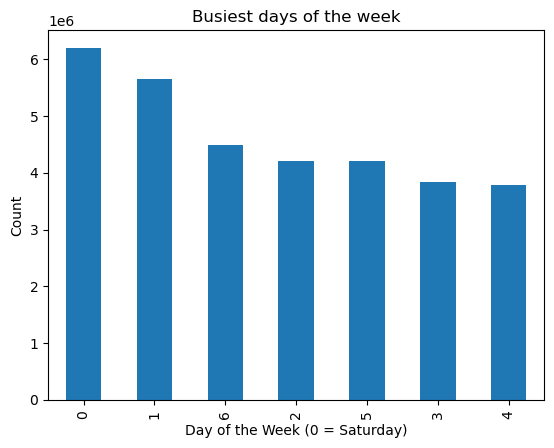

In [5]:
# Sales_bar1_busiest-days-of-week
sales_bar1 = orders_products_all['order_day_of_week'].value_counts().plot.bar()

# legends
plt.xlabel('Day of the Week (0 = Saturday)')
plt.ylabel('Count')
plt.title('Busiest days of the week')

#print
plt.show()

In [6]:
# count values in new column 'busiest_day'
orders_products_all['busiest_day'].value_counts(dropna = False)

Regularly busy    22413231
Most busy          6203329
Least busy         3783172
Name: busiest_day, dtype: int64

In [7]:
#exporting the visual:
sales_bar1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Sales_bar1_busiest-days-of-week.png'))

###### The busiest day is Sunday, followed closely by Monday. The least busiest day is Thursday.

## Sales: 2) What are the busiest hours of the day

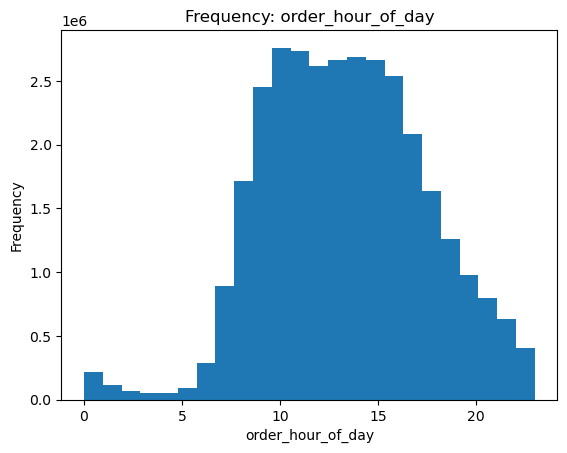

In [8]:
# checking on the frequencies before analysis > create a histogram:
sales_hist1 = orders_products_all['order_hour_of_day'].plot.hist(bins = 24)

# legends
plt.xlabel('order_hour_of_day')
plt.ylabel('Frequency')
plt.title('Frequency: order_hour_of_day')

#print
plt.show()

##### that gives a good first impression to create categories (see scripbt 03 > 'busiest_period_of_day'). Creating another bar-chart to see results more clearly:

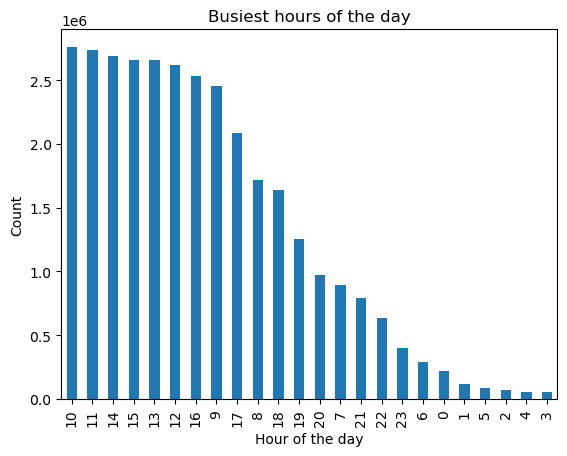

In [9]:
# Sales_bar2_busiest-hours-of-day
sales_bar2 = orders_products_all['order_hour_of_day'].value_counts().plot.bar()

# legends
plt.xlabel('Hour of the day')
plt.ylabel('Count')
plt.title('Busiest hours of the day')

#print
plt.show()

In [10]:
#exporting the visuals:
sales_hist1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Sales_hist1_Frequency_order_hour_of_day.png'))
sales_bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Sales_bar2_busiest-hours-of-day.png'))

###### There are consecutive hours of the day, where there are a lot of orders. To simplifiy this, in script 03 has been created a new column with the following results:

###### busiest periods of hours would be, starting at midnight:
- 0 - 6: Fewest orders
- 7 - 9: Average orders
- 10 - 17: Most orders
- 18 - 22: Average orders
- 23: Fewest orders

In [11]:
# statistics are:
orders_products_all['busiest_period_of_day'].value_counts(dropna = False)

Most orders       20748164
Average orders    10362617
Fewest orders      1288951
Name: busiest_period_of_day, dtype: int64

In [12]:
# crosstab, to have the exact numbers on hours in a tabular form:
crosstab_result_1 = pd.crosstab(orders_products_all['order_hour_of_day'], orders_products_all['busiest_period_of_day'], dropna=False)

In [13]:
crosstab_result_1

busiest_period_of_day,Average orders,Fewest orders,Most orders
order_hour_of_day,,,
0,0,218742,0
1,0,115683,0
2,0,69360,0
3,0,51268,0
4,0,53232,0
5,0,87944,0
6,0,290450,0
7,890923,0,0
8,1717863,0,0


## Sales: 3) times of the day, when people spend more money than at other times

#### creating a line chart on a tailored sample, to save RAM. Random samples are representative and save to use.

#### A) sampling the random sample:

In [14]:
# Sampling comes first
# FIRST: set the seed:
np.random.seed(4)

In [15]:
# Sampling comes first:
# SECOND: Create a list holding True/False values to the test np.random.rand() <= 0.7:
dev1 = np.random.rand(len(orders_products_all)) <= 0.7

In [16]:
# Sampling comes first:
# THIRD: Store 70% of the sample in tha df Big
big1 = orders_products_all[dev1]

In [17]:
# Sampling comes first:
# THIRD: Store 30% of the sample in tha df small
small1 = orders_products_all[~dev1]

In [18]:
# Sampling comes first:
# FOURTH: Always check! number of rows must add up (big + small = all):
len(orders_products_all)

32399732

In [19]:
len(big1)+len(small1)

32399732

#### B) Line Chart: Expenditure and hour of the day:

In [20]:
# the x-axis shall be hour, the y-axis the price. We can still use the 30% sample 'small' and derive a 2nd df for linechart:
orders_products_all_linechart1 = small1[['order_hour_of_day','prices']]

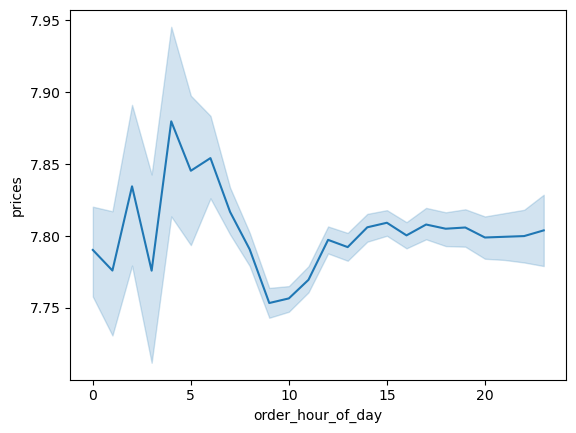

In [21]:
sales_line1 = sns.lineplot(data = orders_products_all_linechart1, x = 'order_hour_of_day',y = 'prices')

#### Some conclusions: Prices vary with the daytime. Around 10 o'clock, low-priced goods are purchased. Higher-prices goods rather after 8 pm. BUT: Especially during the early hours of the night ( midnight - around 6 a.m.), the 'error band' or confidence interval is very wide and indicates, that for that period of time results are not very reliable.

#### C) Line Chart: Expenditure and order day of week, as not all days must be the same:

In [22]:
# further tailor the sample to only hold columns we need for the line chart (prices, orders day of week)
orders_products_all_linechart2 = small1[['order_day_of_week','prices']]

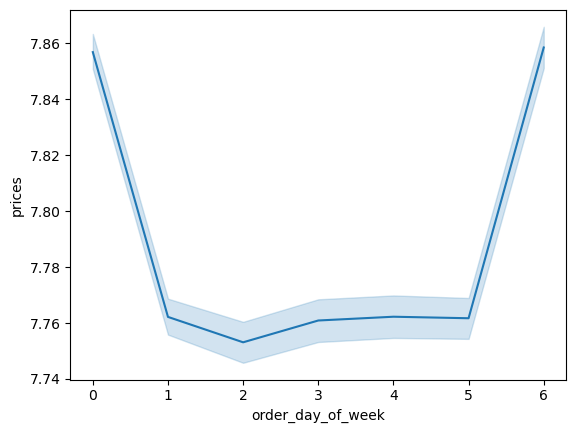

In [23]:
# after sampling creating a line chart on that small, tailored sample:
sales_line2 = sns.lineplot(data = orders_products_all_linechart2, x = 'order_day_of_week',y = 'prices')

In [24]:
#exporting the visual:
sales_line1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Sales_line1_Expenditure_on_order_hour_of_day.png'))
sales_line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Sales_line2_Expenditure_on_order_day_of_week.png'))

## Sales: 4) Create simpler price range groups to reduce complexity of data

##### Check script 03. Generated price ranges in a new column as follows:
- price > 15 = 'high-range product'
- price <= 15 and > 5  = 'high-range product'
- price <= 5 = 'low-range product'

In [25]:
# frequency would be:
orders_products_all['price_range_loc'].value_counts(dropna = False) 

Mid-range product     21860860
Low-range product     10126321
High-range product      412551
Name: price_range_loc, dtype: int64

In [26]:
# multiple aggregations: mean, min, max
orders_products_all.groupby('price_range_loc').agg({'prices': ['mean', 'min', 'max']}).round(1)

prices            
                     mean   min   max
price_range_loc                      
High-range product   20.6  15.1  25.0
Low-range product     3.0   1.0   5.0
Mid-range product     9.8   5.1  15.0

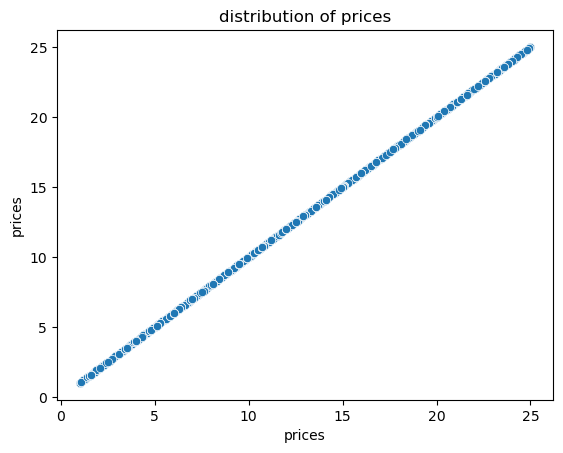

In [27]:
# for checks, see a clear distribution of prices as a scatterplot - not outliers:
sales_scat1=sns.scatterplot(x = 'prices', y = 'prices',data = orders_products_all)

# legends
plt.xlabel('prices')
plt.ylabel('prices')
plt.title('distribution of prices')

#print
plt.show()

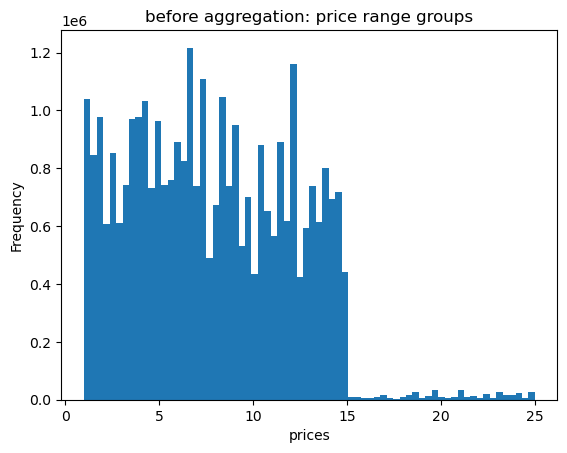

In [28]:
# for checks, see a clear distribution of prices as a histogram - not outliers:
sales_hist2 = orders_products_all['prices'].plot.hist(bins = 70)

# legends
plt.xlabel('prices')
plt.ylabel('Frequency')
plt.title('before aggregation: price range groups')

#print
plt.show()

##### As visible in the graphs, the 3 categories fit well. First, there is an even distribution of prices, since outliers have been removed as part of the data checks. Second, the histogram repeats the frequency: low range prices are like one third, mid-range product is the biggest part (like two thirds), and high ranged products are very rare.

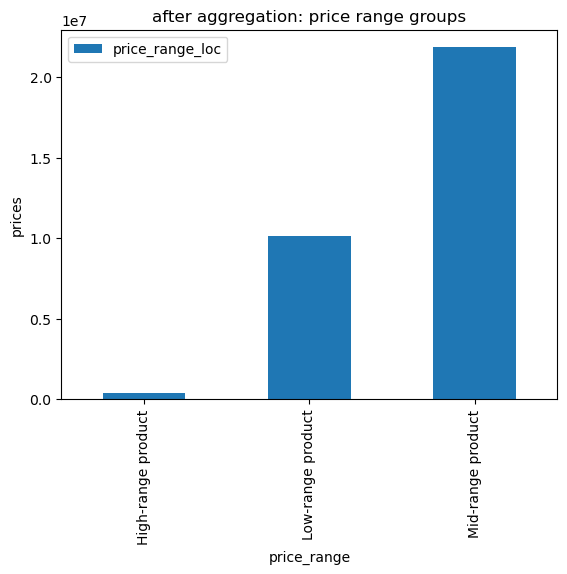

In [29]:
# visualizing code:
sales_bar3 = orders_products_all.groupby('price_range_loc').agg({'price_range_loc': 'count'}).plot.bar()

# legends
plt.xlabel('price_range')
plt.ylabel('prices')
plt.title('after aggregation: price range groups')

#print
plt.show()

In [30]:
#exporting the visuals:
sales_scat1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Sales_scat1_prices.png'))
sales_hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Sales_hist2_prices_frequency.png'))
sales_bar3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Sales_bar3_aggregated_price_range.png'))

## Sales: 5) Most popular products, judging by high frequency of product orders

In [31]:
# aggregating: departments with products, and the count of the product's order_number:
result = orders_products_all.groupby(['department_id']).agg({'order_number': ['count']})

In [32]:
sorted_result = result.sort_values(by=('order_number', 'count'), ascending=False)

In [33]:
sorted_result

,order_number
,count
department_id,
4,9479291
16,5393620
19,2887550
7,2688123
1,2234743
13,1875369
3,1172428
15,1068058


In [34]:
# defining the data dictionary:
data_dict = deps.to_dict('index')

In [35]:
# calling the df:
data_dict

{'1': {'department': 'frozen'},
 '2': {'department': 'other'},
 '3': {'department': 'bakery'},
 '4': {'department': 'produce'},
 '5': {'department': 'alcohol'},
 '6': {'department': 'international'},
 '7': {'department': 'beverages'},
 '8': {'department': 'pets'},
 '9': {'department': 'dry goods pasta'},
 '10': {'department': 'bulk'},
 '11': {'department': 'personal care'},
 '12': {'department': 'meat seafood'},
 '13': {'department': 'pantry'},
 '14': {'department': 'breakfast'},
 '15': {'department': 'canned goods'},
 '16': {'department': 'dairy eggs'},
 '17': {'department': 'household'},
 '18': {'department': 'babies'},
 '19': {'department': 'snacks'},
 '20': {'department': 'deli'},
 '21': {'department': 'missing'}}

In [36]:
# Create labels from deps-dataframe
department_labels = {
     '1': {'department': 'frozen'},
     '2': {'department': 'other'},
     '3': {'department': 'bakery'},
     '4': {'department': 'produce'},
     '5': {'department': 'alcohol'},
     '6': {'department': 'international'},
     '7': {'department': 'beverages'},
     '8': {'department': 'pets'},
     '9': {'department': 'dry goods pasta'},
     '10': {'department': 'bulk'},
     '11': {'department': 'personal care'},
     '12': {'department': 'meat seafood'},
     '13': {'department': 'pantry'},
     '14': {'department': 'breakfast'},
     '15': {'department': 'canned goods'},
     '16': {'department': 'dairy eggs'},
     '17': {'department': 'household'},
     '18': {'department': 'babies'},
     '19': {'department': 'snacks'},
     '20': {'department': 'deli'},
     '21': {'department': 'missing'}
    }

In [37]:
# calculating COUNTS of department_ids
department_counts = orders_products_all['department_id'].value_counts()

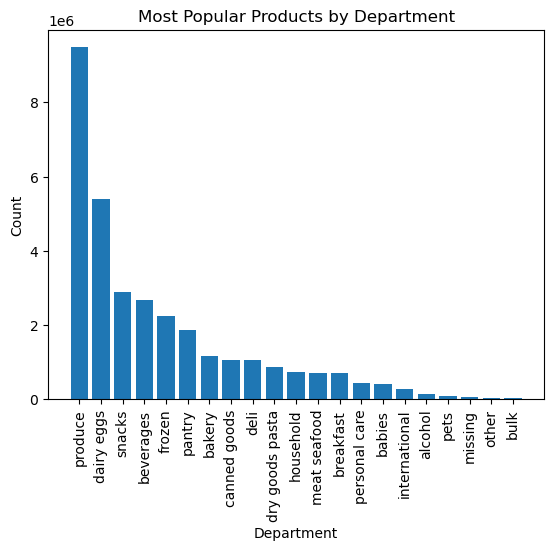

In [38]:
# plotting the bar with department names on x-axis
sales_bar4 = plt.bar([department_labels[str(i)]['department'] for i in department_counts.index], department_counts.values)

# legends
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Most Popular Products by Department')
plt.xticks(rotation=90)

#print 
plt.show()

In [39]:
#exporting the visuals:
sales_bar4[0].figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Sales_bar4_most_popular_products.png'))

###### Most popular goods are produce (like bananas and other fruit), dairy and eggs and snacks. Least popular are 'bulk'.

# Key Questions of Marketing Team

## Marketing: 1) What’s the distribution among users in regards to their brand loyalty ((i.e., how often do they return to Instacart)?

#### Checking on frequencies first:

In [40]:
# overall average: how many days are between each instacart visit:
orders_products_all['days_since_last_order'].mean()

11.103954569034737

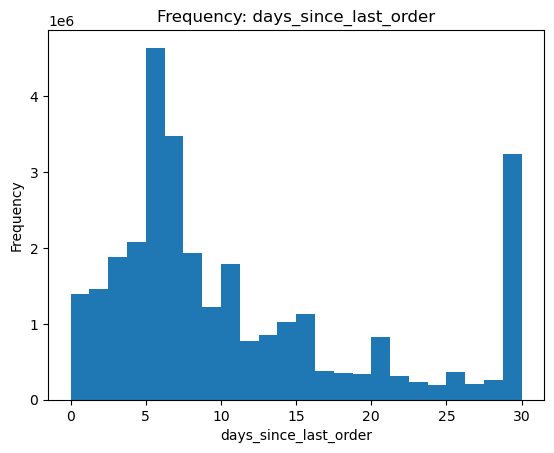

In [41]:
# creating a histogram to understand distribution:
# visualizing code:
marketing_hist1 = orders_products_all['days_since_last_order'].plot.hist(bins = 24)

# legends
plt.xlabel('days_since_last_order')
plt.ylabel('Frequency')
plt.title('Frequency: days_since_last_order')

#print
plt.show()

#### To see programming of new column 'frequency_type', see sript 03. Deriving a frequency definition in grops:
- If mean ('days_since_last_order') > 20, then the customer will be labeled a “Non-frequent customer” 
- If mean ('days_since_last_order') > 10 AND <=20 , then the customer will be labeled a “Regular customer” 
- If mean ('days_since_last_order') <=10, then the customer will be labeled a “Frequent customer”

In [42]:
# statistics of loyalty flag 'frequency_type': 
orders_products_all['frequency_type'].value_counts()

Frequent customer        16464954
Regular customer         12520157
Non-frequent customer     3414616
Name: frequency_type, dtype: int64

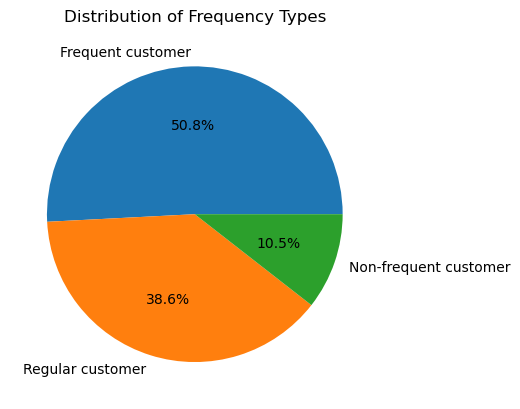

In [43]:
# visualizing code:
frequency_counts = orders_products_all['frequency_type'].value_counts()

# legends
plt.pie(frequency_counts, labels=frequency_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Frequency Types')
marketing_pie1 = plt.gcf()

# show
plt.show()

In [44]:
# statistics of loyalty flag 'frequency_type': 
orders_products_all.groupby('frequency_type').agg({'days_since_last_order': ['mean', 'min', 'max']}).round(1)

days_since_last_order           
                                       mean  min   max
frequency_type                                        
Frequent customer                       6.7  0.0  30.0
Non-frequent customer                  23.9  0.0  30.0
Regular customer                       14.0  0.0  30.0

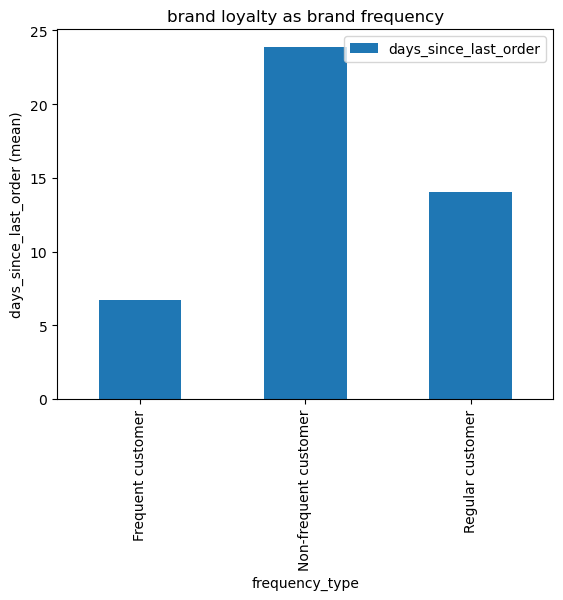

In [46]:
# statistics of loyalty flag 'frequency_type', mean only:
# visualizing code:
marketing_bar1 = orders_products_all.groupby('frequency_type').agg({'days_since_last_order': 'mean'}).plot.bar()

# legends
plt.xlabel('frequency_type')
plt.ylabel('days_since_last_order (mean)')
plt.title('brand loyalty as brand frequency')

# print
plt.show()

In [141]:
#exporting the visuals:
marketing_hist1.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'marketing_hist1_days_since_last_order.png'))
marketing_bar1.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'marketing_bar1_brand_loyalty.png'))
marketing_pie1.savefig(os.path.join(path,'04 Analysis','Visualizations', 'marketing_pie1_brand_loyalty.png'))

## Marketing: 2) Are there differences in ordering habits based on a customer’s loyalty status?

###### Yes - in fact, the loyalty status stems from order habits. See script 03, where depending on the max number of order, the client is either a new, regular, or loyal customer.

######  the definition is in sum:
- If max orders the user has made is over 40, then the customer will be labeled a “Loyal customer.”
- If max orders the user has made is over 10 but less than or equal to 40, then the customer will be labeled a “Regular customer.”
- If max orders the user has made is less than or equal to 10, then the customer will be labeled a “New customer.”

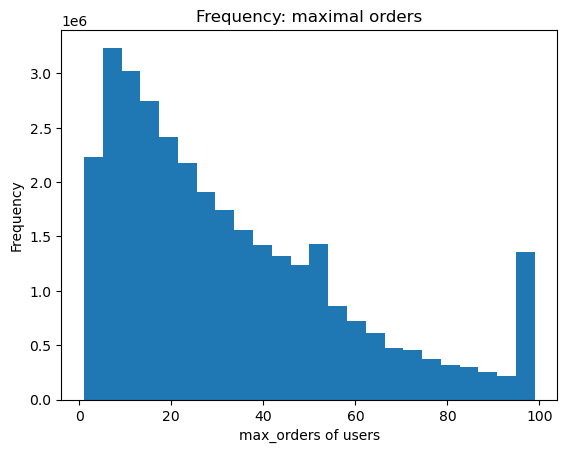

In [48]:
# creating a histogram to understand max_orders:
# visualizing code:
marketing_hist2 = orders_products_all['max_order'].plot.hist(bins = 24)

# legends
plt.xlabel('max_orders of users')
plt.ylabel('Frequency')
plt.title('Frequency: maximal orders')

#print
plt.show()

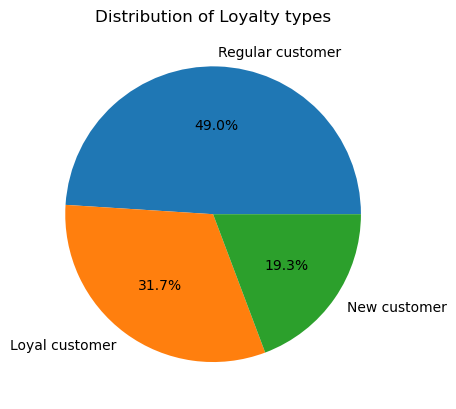

In [49]:
# visualizing code:
frequency_counts = orders_products_all['loyalty_flag'].value_counts()

# legends
plt.pie(frequency_counts, labels=frequency_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Loyalty types')
marketing_pie2 = plt.gcf()

# show
plt.show()

In [142]:
# differences in ordering habits:
orders_products_all.groupby('loyalty_flag').agg({'max_order': ['mean', 'min', 'max']}).round(1)

max_order        
                      mean min max
loyalty_flag                      
Loyal customer        64.0  41  99
New customer           6.6   1  10
Regular customer      23.4  11  40

##### According to the definition above, loyal customers have more orders than other customers: loyal customers order on aferage 32,6 orders, regular customers 12,3. A side note on new customers: clients with <5 orders are taken care of in the final investigation. Here, they are still included.

In [51]:
#exporting the visuals:
marketing_hist2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'marketing_hist2_Frequency_maximal orders.png'))
marketing_pie2.savefig(os.path.join(path,'04 Analysis','Visualizations', 'marketing_pie2_customer_loyalty.png'))

## Marketing: 3) Are there differences in ordering habits based on a customer’s region?

### 1. Matching the regions

In [4]:
# create region variable 
region = []

In [5]:
# assign regions to states
for value in orders_products_all['STATE']:
    if value in ['Maine','New Hampshire', 'Vermont', 'Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        region.append('Midwest')
    elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        region.append('South')
    else:
        region.append('West')

In [6]:
#insert region as column into df
orders_products_all['region'] = region

In [7]:
# to check: counting the values of region
orders_products_all['region'].value_counts(dropna = False)

South        10790096
West          8291679
Midwest       7596065
Northeast     5721892
Name: region, dtype: int64

### 2. Analyzing the customer habits per region

In [57]:
# differences in regions iun terms of order number and prices:
orders_products_all.groupby('region').agg({'order_number': 'count'}).round(3)

,order_number
region,
Midwest,7596065
Northeast,5721892
South,10790096
West,8291679


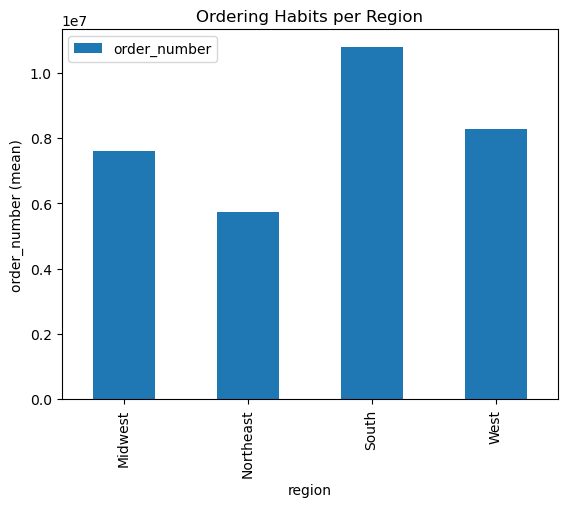

In [58]:
# visualizing code
marketing_bar2 = orders_products_all.groupby('region').agg({'order_number': 'count'}).plot.bar()

# legends
plt.xlabel('region')
plt.ylabel('order_number (mean)')
plt.title('Ordering Habits per Region')
figure_marketing_bar2 = marketing_bar2.get_figure()

# Anzeigen des Diagramms
plt.show()

In [59]:
#exporting the visuals:
figure_marketing_bar2.savefig(os.path.join(path,'04 Analysis','Visualizations', 'marketing_bar2_ordering_habits.png'))

### 3. Further stats - not inlcuded in the clients' report:

In [60]:
# 
orders_products_all.groupby('region')['frequency_type'].value_counts().round(3)

region     frequency_type       
Midwest    Frequent customer        3801630
           Regular customer         2987386
           Non-frequent customer     807049
Northeast  Frequent customer        2940733
           Regular customer         2179730
           Non-frequent customer     601429
South      Frequent customer        5463088
           Regular customer         4185476
           Non-frequent customer    1141527
West       Frequent customer        4259503
           Regular customer         3167565
           Non-frequent customer     864611
Name: frequency_type, dtype: int64

###### Percentages of frequency types are about the same per region. Frequent customers are about 50% per region. 

In [61]:
orders_products_all.groupby('region')['spender_type'].value_counts().round(3)

region     spender_type
Midwest    low spender      7566800
           high spender       29265
Northeast  low spender      5703253
           high spender       18639
South      low spender     10749519
           high spender       40577
West       low spender      8260441
           high spender       31238
Name: spender_type, dtype: int64

###### The majority per region are low spenders. Advertisement of low priced products will be beneficial for sales.

In [62]:
orders_products_all.groupby('region')['loyalty_flag'].value_counts().round(3)

region     loyalty_flag    
Midwest    Regular customer    3750271
           Loyal customer      2373472
           New customer        1472322
Northeast  Regular customer    2780322
           Loyal customer      1841559
           New customer        1100011
South      Regular customer    5310755
           Loyal customer      3405328
           New customer        2074013
West       Regular customer    4032780
           Loyal customer      2662404
           New customer        1596495
Name: loyalty_flag, dtype: int64

###### Percentages of loyalty types are about the same per region. Regular customers are about 50% per region, loyal customers roughly one third.

###### Conslusion: There are no evident differences per region. There might be local preferences in (local) products, but this is not analyzed here, as the regions are very large. Local preferences in products are expected to be based more on a city or a disctrict.

## Marketing: 4) Is there a connection between age and family status in terms of ordering habits?

### Age and spending habits:

In [63]:
# is there a connection between 'fam_status' and prices:
orders_products_all.groupby('Age').agg({'prices': ['sum','mean', 'min', 'max']}).round(1)

prices                
           sum mean  min   max
Age                           
18   3906621.1  7.8  1.0  25.0
19   4055505.2  7.8  1.0  25.0
20   3908325.9  7.8  1.0  25.0
21   3987871.7  7.8  1.0  25.0
22   3999497.9  7.8  1.0  25.0
..         ...  ...  ...   ...
77   3895188.5  7.8  1.0  25.0
78   3866223.3  7.8  1.0  25.0
79   4119247.6  7.8  1.0  25.0
80   4019347.1  7.8  1.0  25.0
81   3973369.3  7.8  1.0  25.0

[64 rows x 4 columns]

In [64]:
# defining small sample for line chart
df_2 = small1[['Age','prices']]

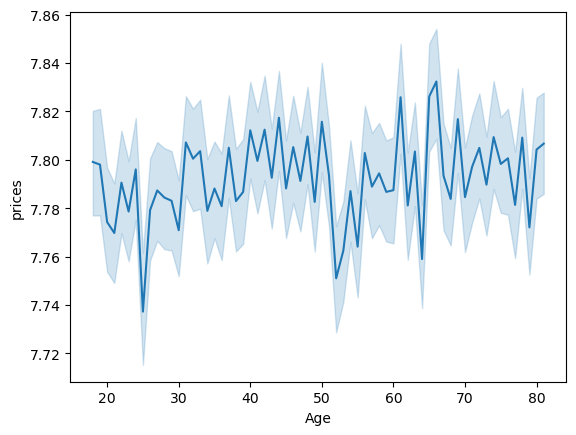

In [65]:
# creating line chart
marketing_line2 = line = sns.lineplot(data = df_2, x = 'Age',y = 'prices')

In [66]:
#exporting the visuals:
marketing_line2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'marketing_line2_Age_prices.png'))

###### There is no apparent connection between age and spending habits.

### Family status and spending habits.

In [67]:
# checking on sum of prices as amount of money spent and average income:
orders_products_all.groupby('fam_status').agg({'prices': 'sum', 'income': 'mean', 'order_number': 'count', 'Age': 'mean'}).round(1)

,prices,income,order_number,Age
fam_status,,,,
divorced/widowed,21619270.8,115631.0,2771355,70.5
living with parents and siblings,12094239.6,70676.8,1550402,19.5
married,177262104.9,101296.8,22753055,51.5
single,41450505.3,91313.2,5324920,38.6


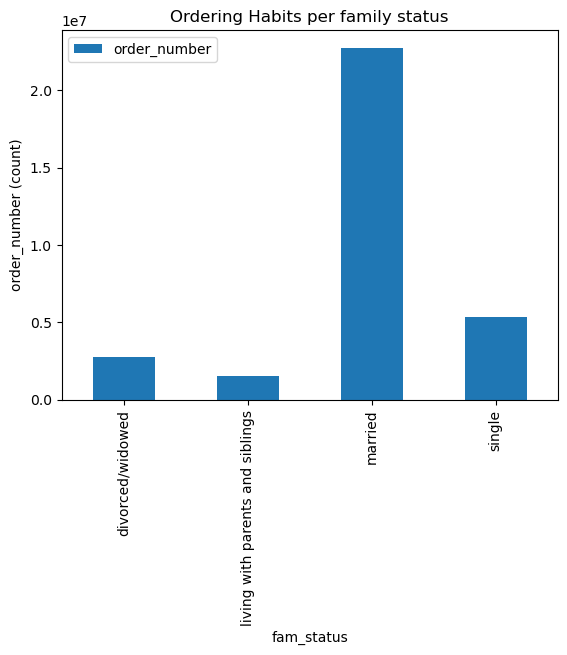

In [68]:
# visualizing code
marketing_bar3 = orders_products_all.groupby('fam_status').agg({'order_number': 'count'}).plot.bar()

# legends
plt.xlabel('fam_status')
plt.ylabel('order_number (count)')
plt.title('Ordering Habits per family status')
figure_marketing_bar3 = marketing_bar3.get_figure()

# Anzeigen des Diagramms
plt.show()

In [69]:
#exporting the visuals:
figure_marketing_bar3.savefig(os.path.join(path,'04 Analysis','Visualizations', 'marketing_bar3_ordering_habits_per_famstatus.png'))

###### Married has the highest amount spent, living with parents and siblings (that is, teenager), spend the least. As for income, divorced/widowed outrank married people. The amount of shopping is hieghest with married people and lowest with those, who live with them ( living with parents and siblings). So, there is a definite connection between familiy status and spending habits. If there are customer profiles to be made, family status is important to consider.

## Marketing: 5) What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?

### To check on possible classifications, we have get a better picture of the data.

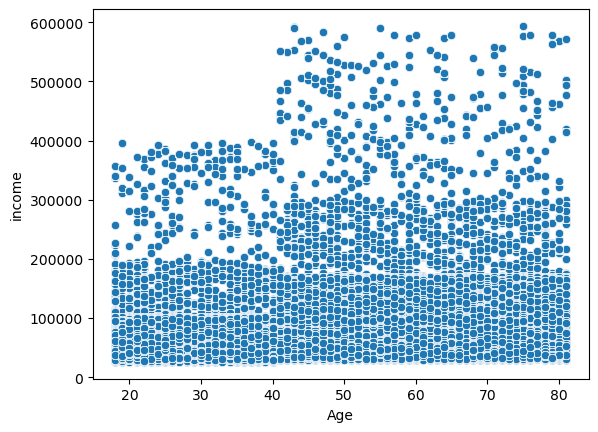

In [70]:
# analyzing age and income:
scatplot3 = sns.scatterplot(x = 'Age', y = 'income',data = orders_products_all)

###### Thoughts on the scatterplot above: 200,000 Dollars seem to be the foundation that can be expected from all instacart target groups. There is a definite jump in income at about 40 years of age, when spending power rises to a customer group between 200k and 300k and above them individuals with income up to 600k. This pattern covers people 40 years of age up to 80 years of age.

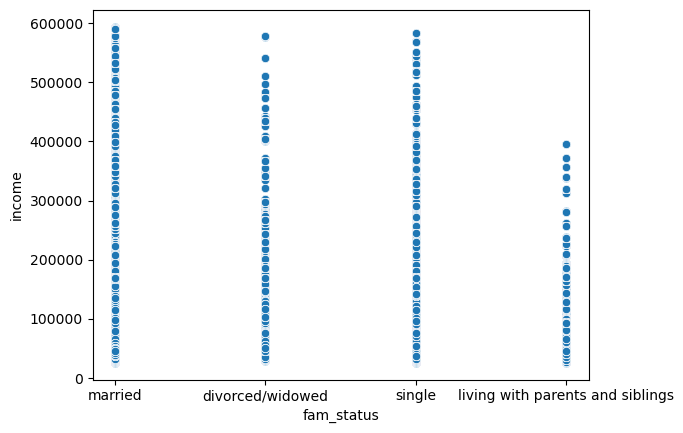

In [71]:
# analyzing age and income:
scatplot4 = sns.scatterplot(x = 'fam_status', y = 'income',data = orders_products_all)

In [72]:
# analyzing age and number of dependants:
# Using the 30% sample 'small' and derive a 3rd df for linechart:
orders_products_all_linechart3 = small1[['Age','n_dependants']]

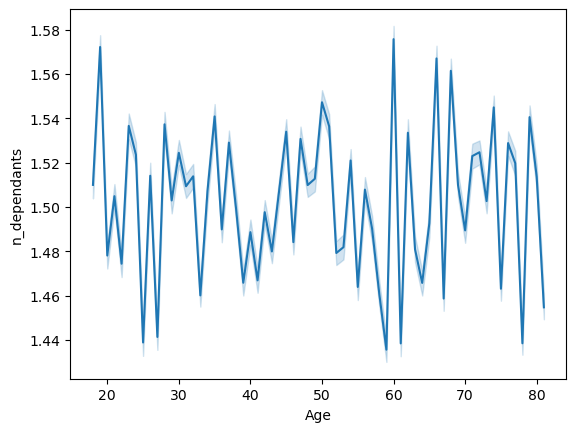

In [73]:
marketing_line1 = sns.lineplot(data = orders_products_all_linechart3, x = 'Age',y = 'n_dependants')

In [74]:
#exporting the visuals:
scatplot3.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'marketing_scatplot3_Age_vs_income.png'))
scatplot4.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'marketing_scatplot4_famstatus_vs_income.png'))
marketing_line1.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'marketing_line1_Age_vs_dependants.png'))

### Conclusions.
#### Age vs n_dependants: there is no direct correlation visible. People 20 years of age can have a similar high, or low, number of dependants like people 80 years of age.
#### As seen above, age is not a stand-alone variable, when it comes to depending variables in spending behavior. The more relevant variables are familiy status (different classifications are already in the dataframe, and income are more important to build customer profiles.¶
#### Generally speaking, there are several possible customer profiles, based on certain variables. For example:
- age-based (children, adults, seniors - or other groups like 10-year steps)
- family-status based (fine like in the current dataframe)
- income-based (low income, medium, high income, or more statistic approach like in quantiles)
- product-based (e.g. vegetarians, meatlovers, organic food buyers, etc.)


## Marketing: 6) What differences exist in ordering habits of different customer profiles? Considering the price of orders, the frequency of orders, the products customers are ordering, etc.

#### Customer profiles will be built below in the final investigation.

# Final investigation

## 1) exclusion flag for low-activity customers (< 5 orders) and exclude them from the data. export this sample.¶

In [75]:
# how many max_order < 5 do we have?
result_x = orders_products_all['max_order'].value_counts(dropna=False)
result_sorted = result_x.sort_index(ascending=True)
print(result_sorted)

1           5
2           6
3      686620
4      753414
5      792979
       ...   
95      59871
96      40449
97      44949
98      44585
99    1171076
Name: max_order, Length: 99, dtype: int64


In [76]:
orders_products_all.loc[orders_products_all['max_order'] < 5, 'exclusion_flag_low_activity'] = 'exclude_low_activity_customer'
orders_products_all.loc[orders_products_all['max_order'] >= 5, 'exclusion_flag_low_activity'] = 'include_high_activity_customer'

In [77]:
# create dataframe inlcuding all customers on 'include_high activity_customer'
orders_products_all_include = orders_products_all.loc[orders_products_all['exclusion_flag_low_activity'] == 'include_high_activity_customer'].copy()

In [78]:
# create dataframe inlcuding all customers on 'exclude_low_activity_customer'
orders_products_all_exclude = orders_products_all.loc[orders_products_all['exclusion_flag_low_activity'] == 'exclude_low_activity_customer'].copy()

In [79]:
# exporting the INCLUDE-dataframe as a pickle:
orders_products_all_include.to_pickle(os.path.join(path, '02 Data','Prepared Data','orders_products_all_include.pkl'))

In [80]:
# exporting the EXCLUDE-dataframe as a pickle:
orders_products_all_exclude.to_pickle(os.path.join(path, '02 Data','Prepared Data','orders_products_all_exclude.pkl'))

In [81]:
orders_products_all_exclude['max_order'].value_counts(dropna=False)

4    753414
3    686620
2         6
1         5
Name: max_order, dtype: int64

In [82]:
orders_products_all_include.shape

(30959687, 32)

In [83]:
orders_products_all_exclude.shape

(1440045, 32)

In [84]:
orders_products_all.shape

(32399732, 32)

In [85]:
print(30959687+1440045)

32399732


## 2) customer profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

### profiling on age

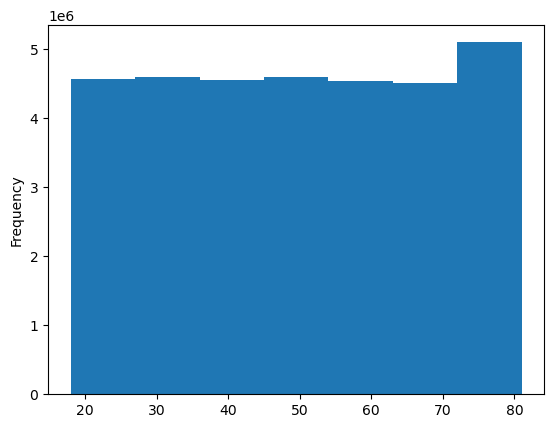

In [8]:
# first a histogram to have a first impression on age distribution:
final_hist1 = orders_products_all['Age'].plot.hist(bins = 7)

In [9]:
#exporting the visuals:
final_hist1.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'final_hist1_Age.png'))

In [10]:
# creating age-groups in 10-year steps:
age_group = []

for value in orders_products_all['Age']:
    if value < 20:
        age_group.append('<20 years')
    elif value >= 20 and value < 30:
        age_group.append('20-29 years')
    elif value >= 30 and value < 40:
        age_group.append('30-39 years')
    elif value >= 40 and value < 50:
        age_group.append('40-49 years')
    elif value >= 50 and value < 60:
        age_group.append('50-59 years')
    elif value >= 60 and value < 70:
        age_group.append('60-69 years')
    elif value >= 70 and value < 80:
        age_group.append('70-79 years')   
    else:
        age_group.append('80+ years')

In [11]:
orders_products_all['Age_group'] = age_group

In [12]:
orders_products_all['Age_group'].value_counts(dropna=False)

40-49 years    5108361
30-39 years    5073019
20-29 years    5069477
50-59 years    5063394
70-79 years    5054618
60-69 years    4986519
80+ years      1024392
<20 years      1019952
Name: Age_group, dtype: int64

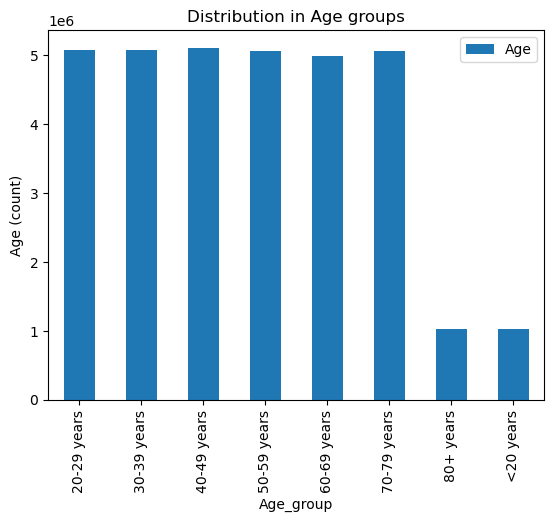

In [13]:
# visualizing code
final_bar1 = orders_products_all.groupby('Age_group').agg({'Age': 'count'}).plot.bar()

# legends
plt.xlabel('Age_group')
plt.ylabel('Age (count)')
plt.title('Distribution in Age groups')
final_bar1 = final_bar1.get_figure()

# Anzeigen des Diagramms
plt.show()

In [14]:
#exporting the visuals:
final_bar1.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Distribution in Age groups.png'))

### profiling on income:

In [69]:
# some basic stats:
statistics = pd.DataFrame({
    'Minimum': [orders_products_all['income'].min()],
    'Maximum': [orders_products_all['income'].max()],
    'Mean': [orders_products_all['income'].mean()],
    'Median': [orders_products_all['income'].median()]
})

print(statistics)

   Minimum  Maximum          Mean   Median
0    25903   593901  99416.851727  96608.0


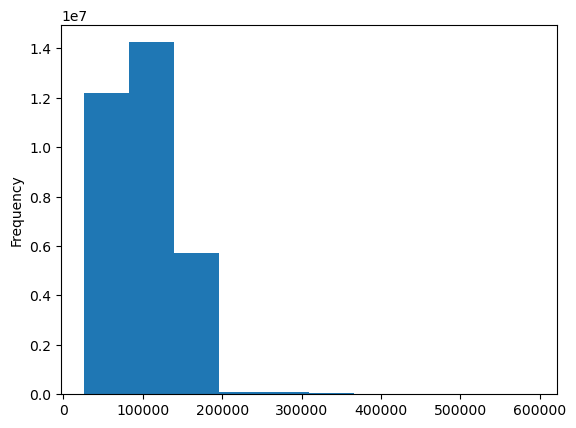

In [18]:
# histogram to have a first impression on income distribution:
final_hist2 = orders_products_all['income'].plot.hist(bins = 10)

In [19]:
#exporting the visuals:
final_hist2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'final_hist2_income.png'))

##### Distribution looks like a normal distribution. Will set up groups in quartiles:

In [20]:
# Quartiles:
quartiles = np.percentile(orders_products_all['income'], [0, 25, 50, 75, 100])

In [21]:
# calling the quartiles
quartiles

array([ 25903.,  66996.,  96608., 127884., 593901.])

In [22]:
income_category = []

for value in orders_products_all['income']:
    if value <= 25903:
        income_category.append('lower')
    elif value > 25903 and value <= 66996:
        income_category.append('lower-middle')
    elif value > 66996 and value <= 96608:
        income_category.append('upper-middle')
    else:
        income_category.append('upper')        

In [23]:
orders_products_all['income_category'] = income_category

In [24]:
orders_products_all['income_category'].value_counts(dropna=False)

upper           16199350
upper-middle     8100350
lower-middle     8100012
lower                 20
Name: income_category, dtype: int64

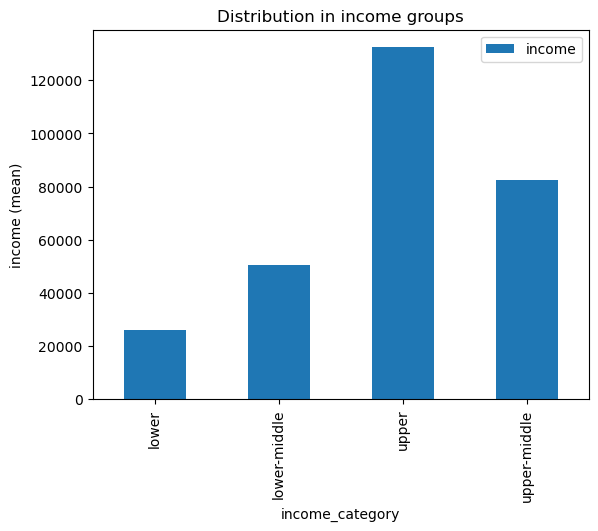

In [25]:
# visualizing code
final_bar2 = orders_products_all.groupby('income_category').agg({'income': 'mean'}).plot.bar()

# legends
plt.xlabel('income_category')
plt.ylabel('income (mean)')
plt.title('Distribution in income groups')
final_bar2 = final_bar2.get_figure()

# Anzeigen des Diagramms
plt.show()

In [26]:
#exporting the visuals:
final_bar2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'final_bar2_Distribution in Age groups.png'))

### profiling on meat-purchaser vs. non-meat-purchaser

#### 1) create a new flag

In [27]:
#create an meat vs non-meat flag 
orders_products_all.loc[orders_products_all['department_id'] == '12', 'meat_or_veg'] = 'meat_purchaser'
orders_products_all.loc[orders_products_all['department_id'] != '12', 'meat_or_veg'] = 'not_meat_purchaser'

In [28]:
# assign the column:
orders_products_all['meat_or_veg'] = orders_products_all['meat_or_veg']

In [29]:
orders_products_all['meat_or_veg'].value_counts(dropna=False)

not_meat_purchaser    31690805
meat_purchaser          708927
Name: meat_or_veg, dtype: int64

#### 2) check distribution

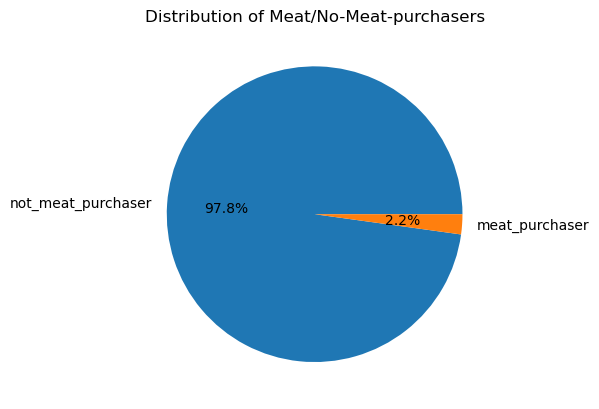

In [30]:
# visualizing code:
frequency_counts = orders_products_all['meat_or_veg'].value_counts()

# legends
plt.pie(frequency_counts, labels=frequency_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Meat/No-Meat-purchasers')
final_pie1 = plt.gcf()

# show
plt.show()

In [31]:
# exporting
final_pie1.savefig(os.path.join(path, '04 Analysis','Visualizations','final_pie1_Meat.png'))

### profiling on number of dependants:

In [32]:
# how does distribution look:
orders_products_all['n_dependants'].value_counts(dropna=False)

3    8133827
0    8096275
2    8089749
1    8079881
Name: n_dependants, dtype: int64

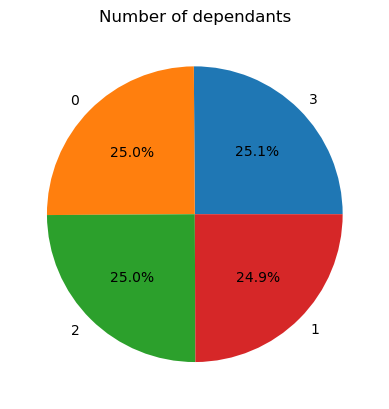

In [33]:
# visualizing code:
frequency_counts = orders_products_all['n_dependants'].value_counts()

# legends
plt.pie(frequency_counts, labels=frequency_counts.index, autopct='%1.1f%%')
plt.title('Number of dependants')
final_pie2 = plt.gcf()

# show
plt.show()

In [34]:
#exporting the visuals:
final_pie2.savefig(os.path.join(path, '04 Analysis','Visualizations','final_pie2_dependants.png'))

##### We don't need further aggregating the numbers. 

## 3) Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

### Age-group > Analysis: expenditure

In [84]:
# statistics on Age_group. Sum of prices is taken here as expenditure.
result = orders_products_all.groupby('Age_group').agg({'prices': ['sum','mean', 'min', 'max'], 'days_since_last_order': ['mean', 'min', 'max']}).round(1)

In [85]:
print(result)

                 prices                 days_since_last_order           
                    sum mean  min   max                  mean  min   max
Age_group                                                               
20-29 years  39433217.1  7.8  1.0  25.0                  11.1  0.0  30.0
30-39 years  39512952.0  7.8  1.0  25.0                  11.1  0.0  30.0
40-49 years  39840945.9  7.8  1.0  25.0                  11.1  0.0  30.0
50-59 years  39417627.1  7.8  1.0  25.0                  11.1  0.0  30.0
60-69 years  38891551.0  7.8  1.0  25.0                  11.1  0.0  30.0
70-79 years  39374984.8  7.8  1.0  25.0                  11.1  0.0  30.0
80+ years     7992716.4  7.8  1.0  25.0                  11.1  0.0  30.0
<20 years     7962126.3  7.8  1.0  25.0                  11.1  0.0  30.0


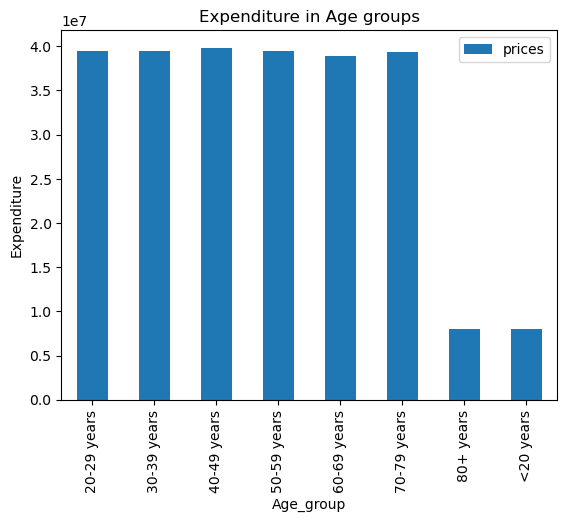

In [36]:
# visualizing code
final_bar3 = orders_products_all.groupby('Age_group').agg({'prices': 'sum'}).plot.bar()

# legends
plt.xlabel('Age_group')
plt.ylabel('Expenditure')
plt.title('Expenditure in Age groups')
final_bar3 = final_bar3.get_figure()

# Anzeigen des Diagramms
plt.show()

In [37]:
#exporting the visuals:
final_bar3.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'final_bar3_Expenditure in Age groups.png'))

#### seniors 80 years and older seem to spend most. 

### Age-group > Analysis: Frequency

In [38]:
orders_products_all.groupby('Age_group')['frequency_type'].value_counts().unstack().fillna(0).astype(int)

frequency_type,Frequent customer,Non-frequent customer,Regular customer
Age_group,,,
20-29 years,2570183,529934,1969360
30-39 years,2567925,531856,1973238
40-49 years,2597088,548311,1962962
50-59 years,2575494,528171,1959729
60-69 years,2548840,533318,1904356
70-79 years,2574711,524448,1955459
80+ years,521045,110747,392600
<20 years,509668,107831,402453


In [39]:
crosstab_result = pd.crosstab(orders_products_all['Age_group'], orders_products_all['frequency_type'])
crosstab_result

frequency_type,Frequent customer,Non-frequent customer,Regular customer
Age_group,,,
20-29 years,2570183,529934,1969360
30-39 years,2567925,531856,1973238
40-49 years,2597088,548311,1962962
50-59 years,2575494,528171,1959729
60-69 years,2548840,533318,1904356
70-79 years,2574711,524448,1955459
80+ years,521045,110747,392600
<20 years,509668,107831,402453


##### even age-group shares in 'frequent customer'. That again shows, that profiling on age is not necessary.

### Income-group > Analysis: 

In [86]:
orders_products_all.groupby('income_category').agg({'prices': ['sum','mean', 'min', 'max'], 'days_since_last_order': ['mean', 'min', 'max']}).round(1)

prices                 days_since_last_order            
                         sum mean  min   max                  mean   min   max
income_category                                                               
lower                   67.5  3.4  1.2   7.4                  19.1  11.0  30.0
lower-middle      59000890.7  7.3  1.0  25.0                  11.3   0.0  30.0
upper            128967272.6  8.0  1.0  25.0                  11.0   0.0  30.0
upper-middle      64457889.8  8.0  1.0  25.0                  11.0   0.0  30.0

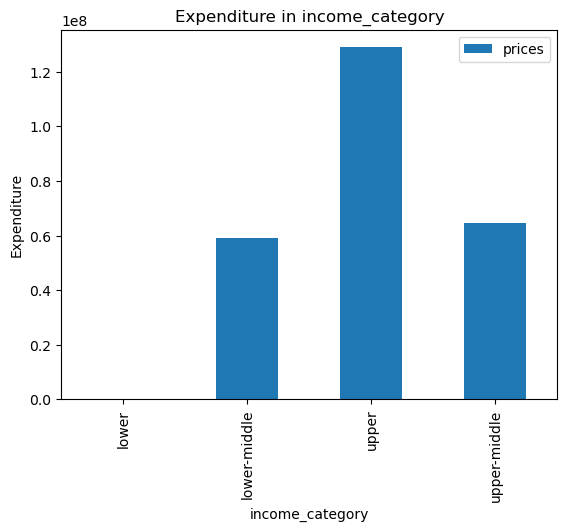

In [41]:
# visualizing code
final_bar4 = orders_products_all.groupby('income_category').agg({'prices': 'sum'}).plot.bar()

# legends
plt.xlabel('income_category')
plt.ylabel('Expenditure')
plt.title('Expenditure in income_category')
final_bar4 = final_bar4.get_figure()

# Anzeigen des Diagramms
plt.show()

In [42]:
#exporting the visuals:
final_bar4.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'final_bar4_Expenditure in income_category.png'))

### Income-group > Frequency: 

In [43]:
crosstab_result2 = pd.crosstab(orders_products_all['income_category'], orders_products_all['frequency_type'])
crosstab_result2

frequency_type,Frequent customer,Non-frequent customer,Regular customer
income_category,,,
lower,0,0,20
lower-middle,4050774,963565,3085673
upper,8264545,1643524,6291276
upper-middle,4149635,807527,3143188


#### Upper income spends the most money; lower middle and upper middle are about the same. Last is lower income group. 20 clients of lower income are regular customers, buts since that group is very small, it doesn't make a difference for marketing purposes.

### Meat / Non-Meat > Analysis: 

In [87]:
orders_products_all.groupby('meat_or_veg').agg({'prices': ['sum','mean', 'min', 'max'], 'days_since_last_order': ['mean', 'min', 'max']}).round(1)

prices                  days_since_last_order       \
                            sum  mean  min   max                  mean  min   
meat_or_veg                                                                   
meat_purchaser       11551570.3  16.3  8.0  25.0                  11.4  0.0   
not_meat_purchaser  240874550.3   7.6  1.0  20.0                  11.1  0.0   

                          
                     max  
meat_or_veg               
meat_purchaser      30.0  
not_meat_purchaser  30.0

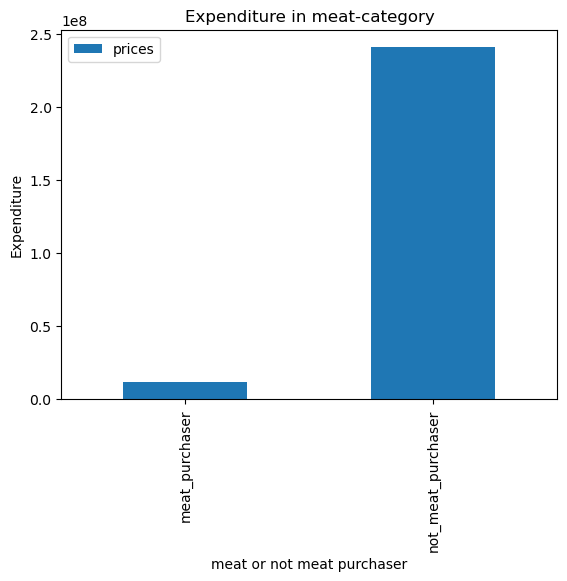

In [45]:
# visualizing code
final_bar5 = orders_products_all.groupby('meat_or_veg').agg({'prices': 'sum'}).plot.bar()

# legends
plt.xlabel('meat or not meat purchaser')
plt.ylabel('Expenditure')
plt.title('Expenditure in meat-category')
final_bar5 = final_bar5.get_figure()

# Anzeigen des Diagramms
plt.show()

In [46]:
#exporting the visuals:
final_bar5.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'final_bar5_Expenditure in meat-category.png'))

### Meat / Non-Meat > Frequency: 

In [47]:
crosstab_result3 = pd.crosstab(orders_products_all['meat_or_veg'], orders_products_all['frequency_type'])
crosstab_result3

frequency_type,Frequent customer,Non-frequent customer,Regular customer
meat_or_veg,,,
meat_purchaser,338526,79140,291261
not_meat_purchaser,16126428,3335476,12228896


#### Since meat is bought comparatively seldom, no further insights on that here. There is a light difference in distribution of frequency, though: The group of not_meat_purchaser is bigger among the frequent customers.

### Number of dependants > Analysis: 

In [88]:
orders_products_all.groupby('n_dependants').agg({'prices': ['sum','mean', 'min', 'max'], 'days_since_last_order': ['mean', 'min', 'max']}).round(1)

prices                 days_since_last_order           
                     sum mean  min   max                  mean  min   max
n_dependants                                                             
0             63069776.1  7.8  1.0  25.0                  11.1  0.0  30.0
1             62990160.2  7.8  1.0  25.0                  11.1  0.0  30.0
2             62974135.9  7.8  1.0  25.0                  11.1  0.0  30.0
3             63392048.4  7.8  1.0  25.0                  11.1  0.0  30.0

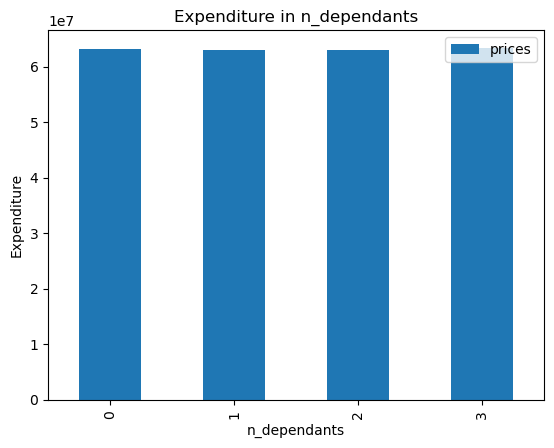

In [49]:
# visualizing code
final_bar6 = orders_products_all.groupby('n_dependants').agg({'prices': 'sum'}).plot.bar()

# legends
plt.xlabel('n_dependants')
plt.ylabel('Expenditure')
plt.title('Expenditure in n_dependants')
final_bar6 = final_bar6.get_figure()

# Anzeigen des Diagramms
plt.show()

In [50]:
#exporting the visuals:
final_bar6.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'final_bar6_Expenditure in n_dependants.png'))

### Number of dependants > Frequency: 

In [51]:
crosstab_result4 = pd.crosstab(orders_products_all['n_dependants'], orders_products_all['frequency_type'])
crosstab_result4

frequency_type,Frequent customer,Non-frequent customer,Regular customer
n_dependants,,,
0,4106778,843981,3145516
1,4134056,860529,3085296
2,4094852,857966,3136931
3,4129268,852140,3152414


In [52]:
crosstab_result4.to_clipboard()

#### Unexpectedly, there is no difference in expenditure regarding number of dependants. Since it is not specified, what number of dependants are children, there might be dependants doing their own shopping, so that in sum there is no difference.

## 4) Compare your customer profiles with regions and departments. Is there a link?

### Before conducting the analysis:
- Age is not a stand alone variable, number of dependants and meat/non-meat don't make a difference for the analysis (how much money is spent) as well.
- The more interesting variable is income, as it has an effect on how much is purchased > I will focus on income groups.

### 4.a) regions vs income-group

In [53]:
# examining distribution between region and income.
orders_products_all.groupby('region')['income_category'].value_counts().round(3)

region     income_category
Midwest    upper              3862123
           lower-middle       1875870
           upper-middle       1858052
           lower                   20
Northeast  upper              2872507
           lower-middle       1428924
           upper-middle       1420461
South      upper              5315767
           upper-middle       2758535
           lower-middle       2715794
West       upper              4148953
           lower-middle       2079424
           upper-middle       2063302
Name: income_category, dtype: int64

#### There is no difference in income distribution within the regions. Upper income groups are about 50%. The highest overall percentage of upper income group is, however, in the Southern region.

### 4.b) department vs income-group

In [54]:
# it's a lot of departments, un-restricting the output window first:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [55]:
# examining distribution between region and income.
result5 = orders_products_all.groupby('income_category')['department_id'].value_counts().round(3)

In [56]:
print(result5)

income_category  department_id
lower            7                     10
                 15                     5
                 3                      2
                 1                      1
                 13                     1
                 4                      1
lower-middle     4                2213496
                 16               1280220
                 19               1003266
                 7                 776444
                 1                 539695
                 13                439715
                 3                 277130
                 20                259756
                 15                235623
                 14                196516
                 17                194532
                 9                 190296
                 12                133395
                 11                114168
                 18                 86387
                 6                  60903
                 5                  39747
   

In [57]:
# calling what department_ids stand for:
deps

department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


#### Lower income differs from the otherwise very homogenic rest. Apparently, lower income groups prefer cheap and not so healthy stuff. The other groups buy produce (like fruits) and dairy + eggs. But lower income groups are not a large buyer group at instacart, so there will be no marketing recommendations to push that customer group.